In [84]:
import yfinance as yf

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
ticker_symbol="MSFT"
ticker=yf.Ticker(ticker_symbol)
data=ticker.history(period="1y")

In [3]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-05 00:00:00-04:00,386.208952,397.988632,382.646240,392.143433,40709200,0.0,0.0
2024-08-06 00:00:00-04:00,396.956566,402.583439,395.467979,396.569519,24946500,0.0,0.0
2024-08-07 00:00:00-04:00,405.530805,406.959821,394.445781,395.398468,20650900,0.0,0.0
2024-08-08 00:00:00-04:00,399.378001,402.771962,396.897022,399.626099,20203000,0.0,0.0
2024-08-09 00:00:00-04:00,400.955906,404.945309,399.199384,402.930756,19276700,0.0,0.0
...,...,...,...,...,...,...,...
2025-07-29 00:00:00-04:00,515.530029,517.619995,511.559998,512.570007,16469200,0.0,0.0
2025-07-30 00:00:00-04:00,515.169983,515.950012,509.440002,513.239990,26380400,0.0,0.0
2025-07-31 00:00:00-04:00,555.229980,555.450012,531.900024,533.500000,51617300,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-08-05 00:00:00-04:00 to 2025-08-04 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Volume        250 non-null    int64  
 5   Dividends     250 non-null    float64
 6   Stock Splits  250 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.6 KB


In [5]:
data["next_close"]=data["Close"].shift(-1)

In [6]:
data=data.drop(["Dividends","Stock Splits","Close"],axis=1)

In [12]:
col=data.columns

In [8]:
data=data.dropna()

In [9]:
data.shape

(249, 5)

In [10]:
data.describe()

,Open,High,Low,Volume,next_close
count,249.000000,249.000000,249.000000,2.490000e+02,249.000000
mean,428.308342,432.156693,424.564003,2.146969e+07,429.133447
std,37.107335,36.442097,37.410818,8.474424e+06,37.356075
min,350.237034,363.812108,344.158197,7.164500e+06,353.910278
25%,406.473572,410.910194,404.803668,1.645950e+07,407.473419
50%,420.060941,424.306104,416.668060,1.936190e+07,421.671570
75%,444.979212,448.546521,439.908725,2.345890e+07,445.556976
max,555.229980,555.450012,531.900024,6.426370e+07,534.140015


In [14]:
for i in col:
  q1=data[i].quantile(0.25)
  q3=data[i].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  data[i]=np.where(data[i]>upper_bound,upper_bound,data[i])
  data[i]=np.where(data[i]<lower_bound,lower_bound,data[i])

<Axes: >

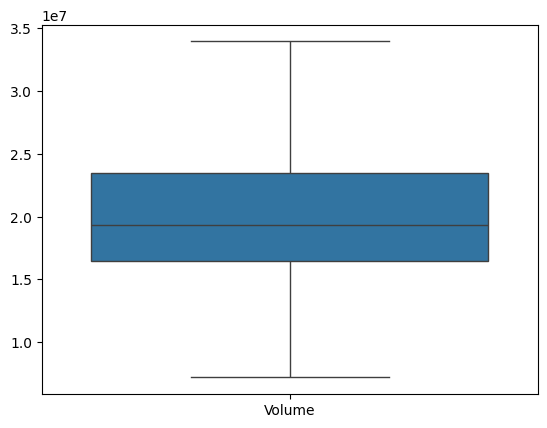

In [17]:
sns.boxplot(data=data[["Volume"]])

<Axes: >

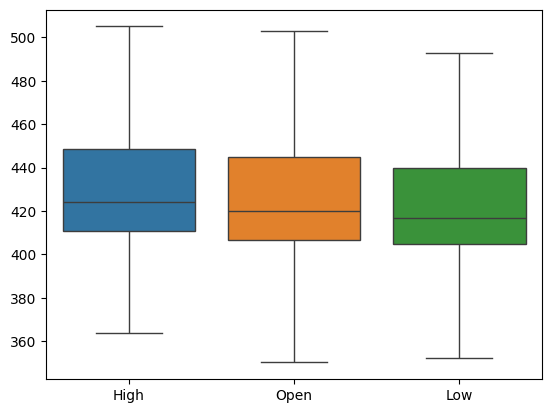

In [18]:
sns.boxplot(data[["High","Open","Low"]])

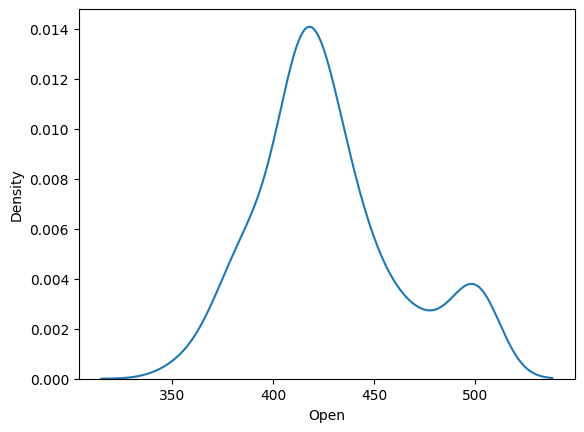

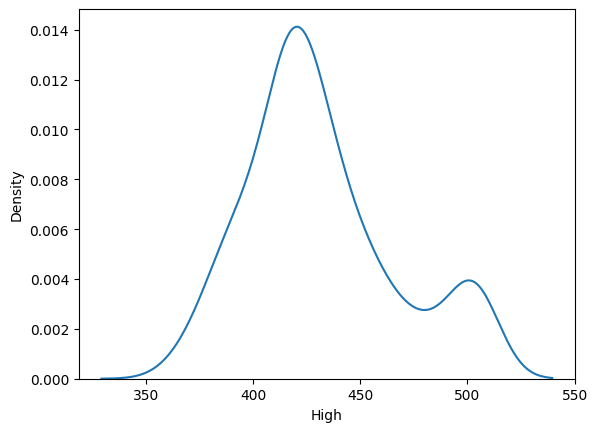

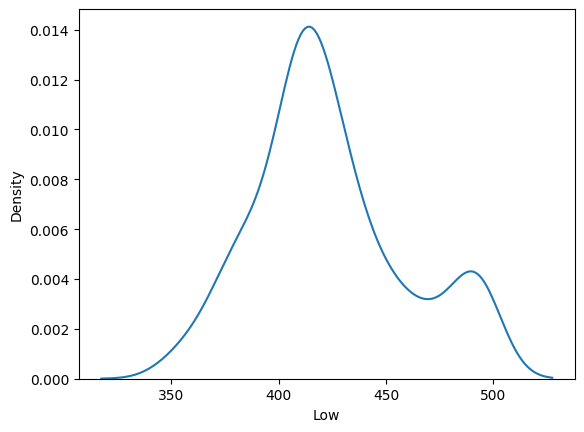

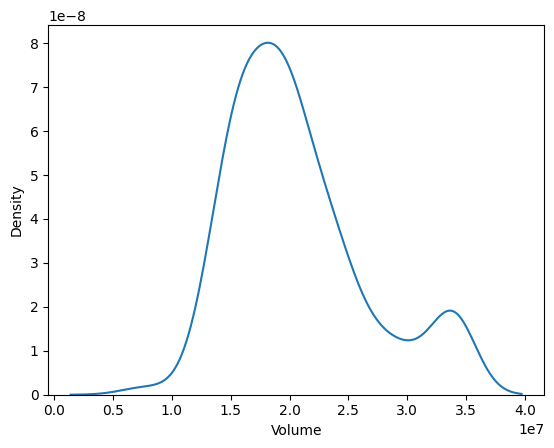

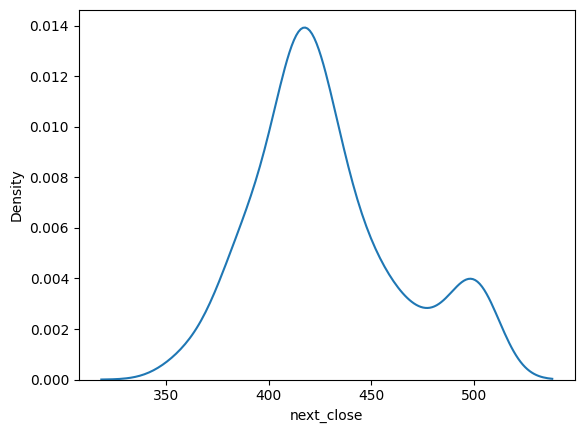

In [23]:
for i in col:
  sns.kdeplot(data[i])
  plt.show()

In [24]:
X=data.drop(["next_close"],axis=1)
y=data["next_close"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
lr=LinearRegression()

In [80]:
model=lr.fit(x_train,y_train)

In [81]:
pred=model.predict(x_test)

In [82]:
mean_squared_error(y_test,pred)

47.66592854112775

In [83]:
r2_score(y_test,pred)

0.9450727944126296

In [87]:
param_grid={}
gsc=GridSearchCV(model,param_grid=param_grid,cv=5,scoring="r2")

In [89]:
gsc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), param_grid={}, scoring='r2')

In [90]:
gsc.best_score_

np.float64(0.9663077449782345)

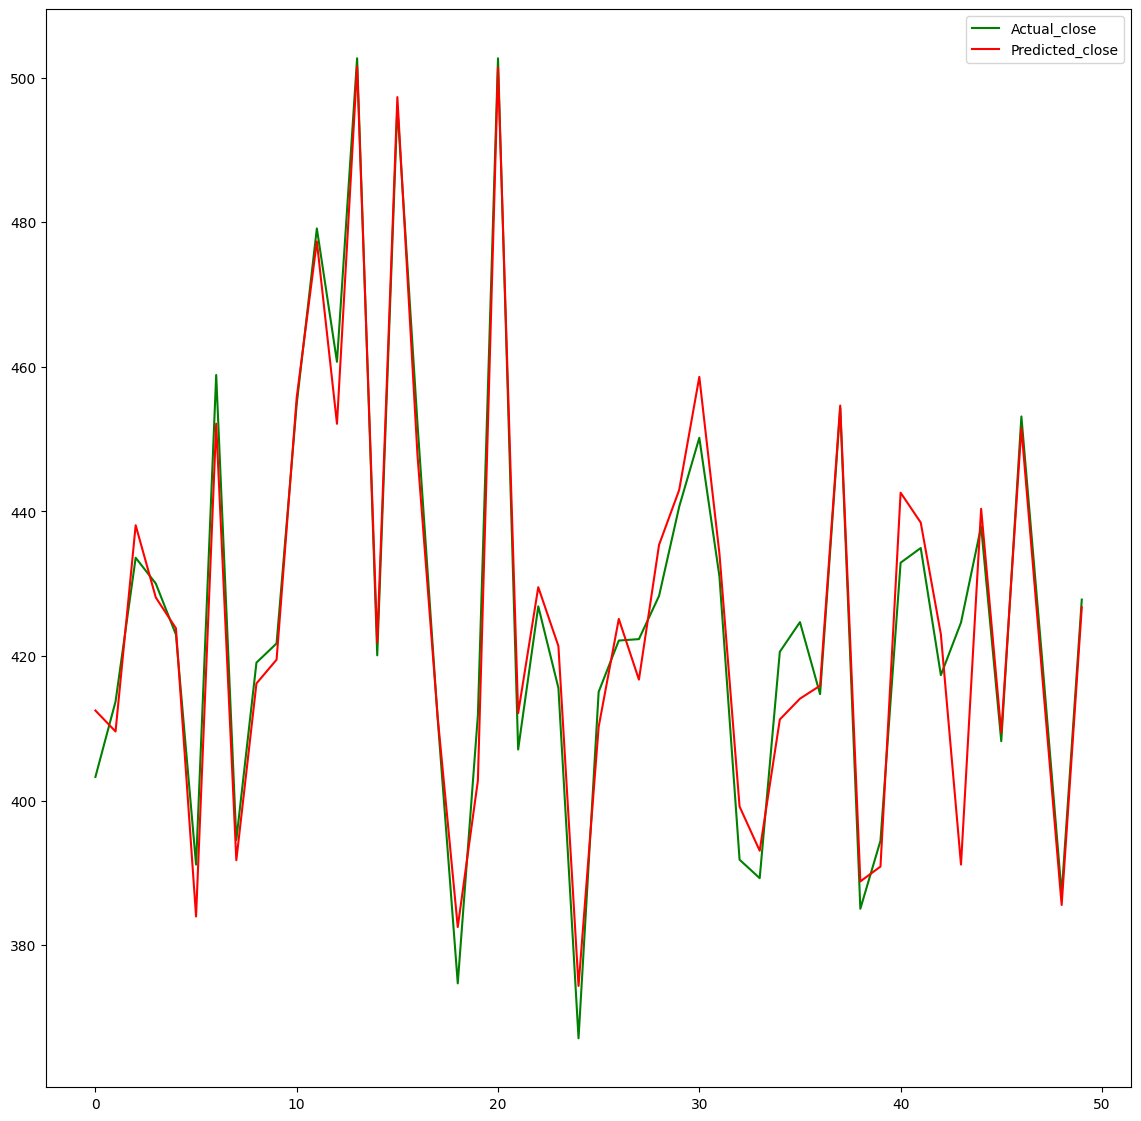

In [94]:
plt.figure(figsize=(14,14))
plt.plot(y_test.values,label="Actual_close",color="green")
plt.plot(pred,label="Predicted_close",color="red")
plt.xlabel="Time"
plt.title=f"{ticker_symbol} plot"
plt.legend()
plt.show()